# Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Read the data
df = pd.read_csv('train-data.csv')
df.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

# EDA & Some Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [3]:
# Check for null values
pd.DataFrame(df.isnull().mean()*100, columns=['% null values']).sort_values(by='% null values', ascending=False)

% null values
New_Price              86.310018
Seats                   0.697790
Engine                  0.598106
Power                   0.598106
Mileage                 0.033228
Unnamed: 0              0.000000
Name                    0.000000
Location                0.000000
Year                    0.000000
Kilometers_Driven       0.000000
Fuel_Type               0.000000
Transmission            0.000000
Owner_Type              0.000000
Price                   0.000000

In [4]:
# Drop some columns
# 'Unnamed: 0' (just an index) 
# 'New_Price' (too many null values)

df.drop(['Unnamed: 0', 'New_Price'], axis=1, inplace=True)

In [5]:
# Change the float format
pd.options.display.float_format = '{:.2f}'.format
df.describe()

Year  Kilometers_Driven   Seats   Price
count 6019.00            6019.00 5977.00 6019.00
mean  2013.36           58738.38    5.28    9.48
std      3.27           91268.84    0.81   11.19
min   1998.00             171.00    0.00    0.44
25%   2011.00           34000.00    5.00    3.50
50%   2014.00           53000.00    5.00    5.64
75%   2016.00           73000.00    5.00    9.95
max   2019.00         6500000.00   10.00  160.00

`Some Strange Numbers`
* 'Kilometers_Driven' has max. of 6500000
* 'Seats' has min. of 0
* 'Price' has max. of 160.0 which is very far from 75% quartile of 9.95

`We will handle these outliers later`

In [6]:
df.describe(include='O')

Name Location Fuel_Type Transmission Owner_Type  \
count                     6019     6019      6019         6019       6019   
unique                    1876       11         5            2          4   
top     Mahindra XUV500 W8 2WD   Mumbai    Diesel       Manual      First   
freq                        49      790      3205         4299       4929   

          Mileage   Engine   Power  
count        6017     5983    5983  
unique        442      146     372  
top     18.9 kmpl  1197 CC  74 bhp  
freq          172      606     235

`Mileage, Engine and Power features need to be converted to float type.`

In [7]:
# Drop the null values as they are less than 1% of the data
df.dropna(inplace=True)

In [8]:
# Check the 'Name' feature 
print('Number of unique values in Name feature: ', df['Name'].nunique())
df.Name.sample(10)

Number of unique values in Name feature:  1855


3889                     Maruti Dzire VDI
5936    Volkswagen Vento 1.5 TDI Highline
4397             Hyundai Grand i10 Sportz
335                       Maruti Alto LXi
4762     Hyundai Creta 1.6 CRDi SX Option
700                       Maruti Ritz LXi
5306              Maruti Wagon R LX BSIII
2927                Maruti Celerio ZXI AT
4465        Hyundai Verna 1.6 SX VTVT (O)
5583                 Volvo XC60 D4 SUMMUM
Name: Name, dtype: object

`There is a pattern in the 'Name' column. The brand name appears first followed by the model name.
 We can extract them into separate columns.`

In [9]:
df['Brand'] = df.Name.str.split(' ').str[0]
df['Model'] = df.Name.str.split(' ').str[1]

df.drop('Name', axis=1, inplace=True)

In [10]:
# Check the new features
print('Number of unique values in Brand feature: ', df['Brand'].nunique())
print('Number of unique values in Model feature: ', df['Model'].nunique())

Number of unique values in Brand feature:  31
Number of unique values in Model feature:  209


In [11]:
df['Age'] = df.Year.max() + 1 - df.Year

In [12]:
# Check other categorical features
for col in ['Owner_Type', 'Seats', 'Brand', 'Location', 'Fuel_Type', 'Transmission']:
    print(df[col].value_counts())
    print('--------------------------------')

Owner_Type
First             4903
Second             953
Third              111
Fourth & Above       8
Name: count, dtype: int64
--------------------------------
Seats
5.00     5012
7.00      674
8.00      134
4.00       99
6.00       31
2.00       16
10.00       5
9.00        3
0.00        1
Name: count, dtype: int64
--------------------------------
Brand
Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Ben

In [13]:
# Some Feature Engineering
# df.Owner_Type = df.Owner_Type.map({'First':1, 'Second':2, 'Third':3, 'Fourth & Above':4})

# Convert 'Engine' and 'Power' to numeric
df.Engine = pd.to_numeric(df.Engine.str.split(' ').str[0], errors='coerce')
df.Power = pd.to_numeric(df.Power.str.split(' ').str[0], errors='coerce')

In [14]:
# Now we have some null values
pd.DataFrame(df.isnull().mean()*100, columns=['% null values']).sort_values(by='% null values', ascending=False)

% null values
Power                       1.72
Location                    0.00
Year                        0.00
Kilometers_Driven           0.00
Fuel_Type                   0.00
Transmission                0.00
Owner_Type                  0.00
Mileage                     0.00
Engine                      0.00
Seats                       0.00
Price                       0.00
Brand                       0.00
Model                       0.00
Age                         0.00

In [15]:
df.sample(5)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
1992  Hyderabad  2012              82085    Diesel       Manual      First   
5971  Hyderabad  2013              65000    Diesel       Manual     Second   
1159      Kochi  2018              50234    Petrol       Manual      First   
4378     Mumbai  2016              29000    Diesel       Manual      First   
648      Jaipur  2009              82000    Diesel       Manual     Second   

         Mileage  Engine  Power  Seats  Price       Brand   Model  Age  
1992  20.77 kmpl    1248  88.76   7.00   6.50      Maruti  Ertiga    8  
5971  20.14 kmpl    1498  88.00   5.00   3.50  Volkswagen    Polo    7  
1159   18.9 kmpl    1197  81.86   5.00   4.77     Hyundai   Grand    2  
4378   24.4 kmpl    1120  71.00   5.00   5.95     Hyundai   Xcent    4  
648    13.5 kmpl    1405    NaN   5.00   0.75        Tata  Indica   11

In [16]:
# Mileage has different units, so we need to convert them to the same unit
df.Mileage

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 5975, dtype: object

In [17]:
# Convert the units to km/kg
def get_mileage(x):
    num = float(x.split(' ')[0])
    unit = x.split(' ')[1]
    if unit == 'km/kg':
        return num
    elif unit == 'kmpl':
        return num*1.61
    else:
        return np.nan
    
df.Mileage = df.Mileage.apply(get_mileage)

`'Power' has very low null values, but we will impute them`

In [18]:
df.describe()

Year  Kilometers_Driven  Mileage  Engine   Power   Seats   Price  \
count 5975.00            5975.00  5975.00 5975.00 5872.00 5975.00 5975.00   
mean  2013.39           58674.31    29.10 1621.61  113.28    5.28    9.50   
std      3.25           91558.51     7.17  601.04   53.88    0.81   11.21   
min   1998.00             171.00     0.00  624.00   34.20    0.00    0.44   
25%   2012.00           33908.00    24.31 1198.00   75.00    5.00    3.50   
50%   2014.00           53000.00    29.14 1493.00   97.70    5.00    5.65   
75%   2016.00           73000.00    33.68 1984.00  138.10    5.00    9.95   
max   2019.00         6500000.00    45.72 5998.00  560.00   10.00  160.00   

          Age  
count 5975.00  
mean     6.61  
std      3.25  
min      1.00  
25%      4.00  
50%      6.00  
75%      8.00  
max     22.00

In [19]:
df.describe(include='object')

Location Fuel_Type Transmission Owner_Type   Brand  Model
count      5975      5975         5975       5975    5975   5975
unique       11         4            2          4      31    209
top      Mumbai    Diesel       Manual      First  Maruti  Swift
freq        784      3195         4266       4903    1197    343

`Now, Data Types are correct`

`Let's check the distributions of the numerical features`

In [20]:
# Distribution of the numerical features
# make grid plot
for col in ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']:
    fig = px.histogram(df, x=col, width= 600, marginal='box', nbins=20)
    fig.show()

In [21]:
df.quantile([0, 0.1, 0.25,  0.9, 0.95, 0.99, 0.995, 1], numeric_only=True)

Year  Kilometers_Driven  Mileage  Engine  Power  Seats  Price   Age
0.00 1998.00             171.00     0.00  624.00  34.20   0.00   0.44  1.00
0.10 2009.00           20000.00    20.45 1061.00  67.04   5.00   2.35  3.00
0.25 2012.00           33908.00    24.31 1198.00  75.00   5.00   3.50  4.00
0.90 2017.00           96719.00    38.38 2494.00 184.00   7.00  22.50 11.00
0.95 2018.00          120000.00    40.89 2982.00 204.00   7.00  32.50 13.00
0.99 2019.00          172297.00    45.22 3197.26 287.22   8.00  56.04 16.00
0.99 2019.00          202461.34    45.72 3510.87 335.20   8.00  67.00 18.00
1.00 2019.00         6500000.00    45.72 5998.00 560.00  10.00 160.00 22.00

`There are clear outliers in the 'Kilometer_Driven', 'Mileage' and 'Price' columns. We will remove them Now.`

In [22]:
# We would use quantiles to remove outliers

# Take a copy of the data first
df_copy = df.copy()

# Remove the outliers
df_copy = df_copy[df_copy.Kilometers_Driven < df_copy.Kilometers_Driven.quantile(0.99)]
df_copy = df_copy[df_copy.Mileage > 0]
df_copy = df_copy[df_copy.Seats > 0]
df_copy = df_copy[df_copy.Price <= 75]


In [23]:
# Recheck the distribution of the numerical features
for col in ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']:
    fig = px.histogram(df_copy, x=col, width= 600, marginal='box', nbins=20)
    fig.show()

In [24]:
# Compare the two dataframes
print('Shape of the original dataframe: ', df.shape)
print('Shape of the new dataframe: ', df_copy.shape)
print('Percentage of data removed: {:.2f}%'.format((df.shape[0]-df_copy.shape[0])/df.shape[0]*100))

Shape of the original dataframe:  (5975, 14)
Shape of the new dataframe:  (5849, 14)
Percentage of data removed: 2.11%


In [25]:
df_copy.Brand.value_counts()

Brand
Maruti           1195
Hyundai          1070
Honda             598
Toyota            384
Volkswagen        311
Mercedes-Benz     301
Ford              293
Mahindra          264
BMW               258
Audi              233
Tata              181
Skoda             168
Renault           145
Chevrolet         120
Nissan             91
Land               49
Jaguar             38
Mitsubishi         26
Mini               26
Fiat               24
Volvo              20
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Name: count, dtype: int64

In [26]:
df_copy.quantile([0.8, 0.9, 0.95, 0.99, 1], numeric_only=True)

Year  Kilometers_Driven  Mileage  Engine  Power  Seats  Price   Age
0.80 2016.00           77909.40    35.53 1998.00 150.00   5.00  12.49  9.00
0.90 2017.00           93340.20    38.48 2494.00 184.00   7.00  22.00 11.00
0.95 2018.00          115000.00    40.89 2967.00 204.00   7.00  31.97 13.00
0.99 2019.00          150000.00    45.22 2996.00 272.00   8.00  53.92 16.00
1.00 2019.00          172050.00    45.72 5998.00 552.00  10.00  75.00 22.00

<Axes: >

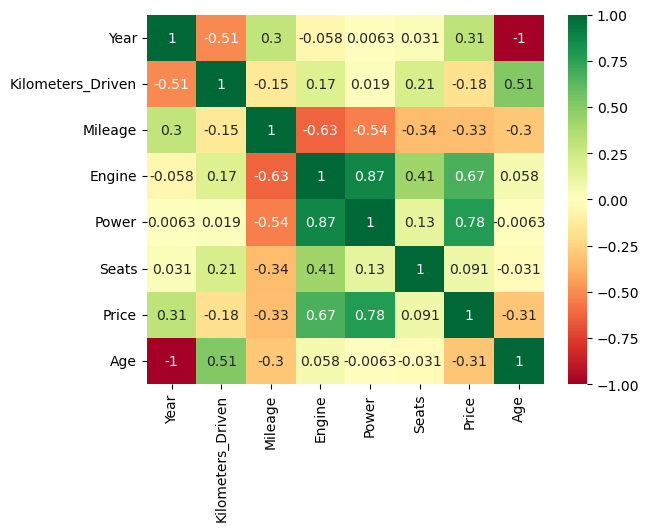

In [27]:
# Check the correlation between the numerical features
# Heatmap
sns.heatmap(df_copy.corr(numeric_only=True), annot=True, cmap='RdYlGn', center=0)

In [28]:
# Correlation with the target
df_copy.corr(numeric_only=True)['Price'].sort_values(ascending=False)

Price                1.00
Power                0.78
Engine               0.67
Year                 0.31
Seats                0.09
Kilometers_Driven   -0.18
Age                 -0.31
Mileage             -0.33
Name: Price, dtype: float64

In [29]:
# Reascending 
asc_num_features = df_copy.corr(numeric_only=True)['Price'].apply(abs).sort_values(ascending=False).drop('Price')
asc_num_features

Power               0.78
Engine              0.67
Mileage             0.33
Age                 0.31
Year                0.31
Kilometers_Driven   0.18
Seats               0.09
Name: Price, dtype: float64

In [30]:
px.bar(asc_num_features, width=600, category_orders={'index':asc_num_features.index}, orientation='h')

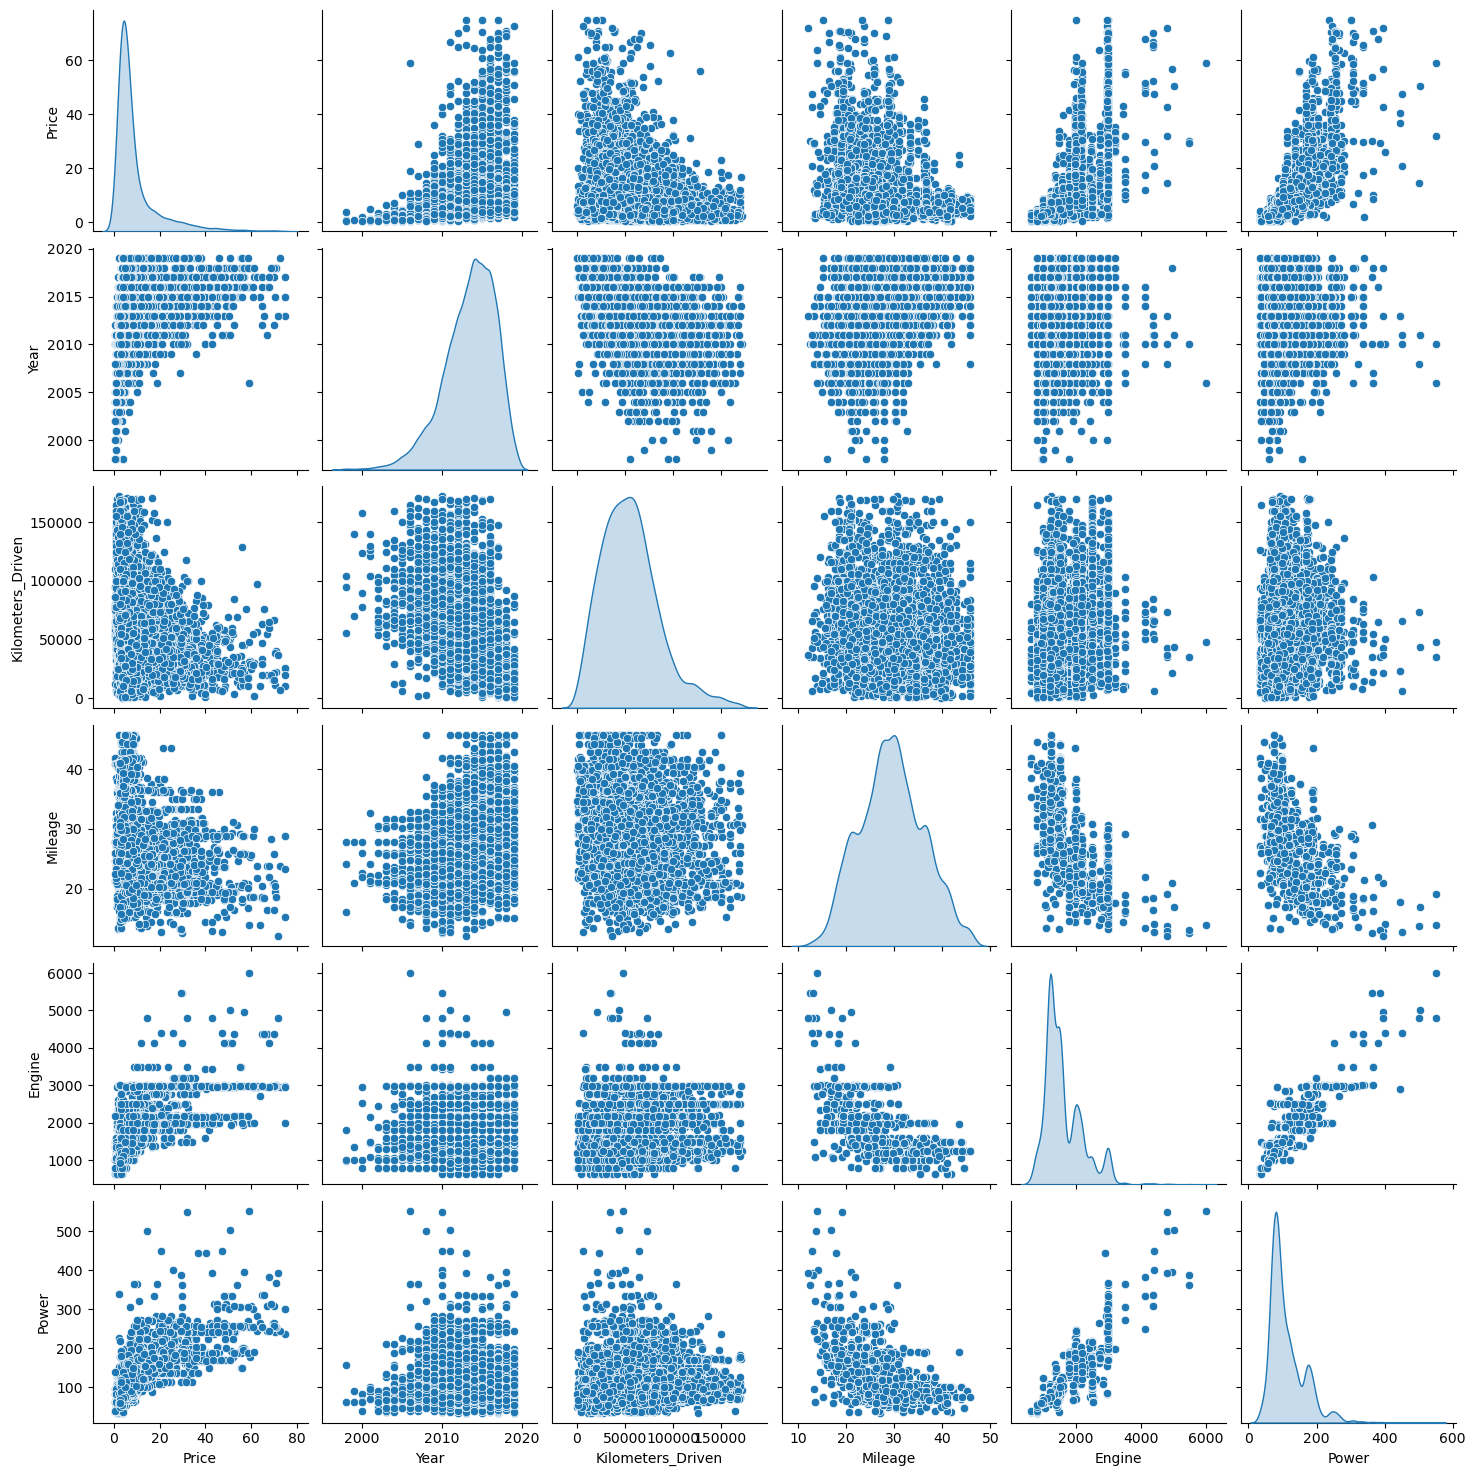

In [31]:
sns.pairplot(df_copy[['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']], diag_kind='kde')

In [32]:
df_copy.to_csv('cleaned_data.csv', index=False)

# Data Splitting


In [37]:
X = df_copy.drop(['Price', 'Age', 'Seats'], axis=1)
y = df_copy.Price.copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape

((4679, 11), (1170, 11))

In [39]:
X_train.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Brand', 'Model'],
      dtype='object')

In [40]:
# Splitting Columns

num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Year']
nom_cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Brand', 'Model']  
ord_cat_cols = ['Owner_Type']  

# Data Preprocessing


In [41]:
# !pip install category-encoders

In [42]:
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='median')),
                                         ('scaler', StandardScaler())])

# Preprocessing for categorical data
nominal_categorical_transformer = Pipeline(steps=[('binary', BinaryEncoder())])
ordinal_categorical_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories=[['Fourth & Above', 'Third', 'Second', 'First']]))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num_prep', numerical_transformer, num_cols),
                                                ('nom_prep', nominal_categorical_transformer, nom_cat_cols),
                                                ('ord_prep', ordinal_categorical_transformer, ord_cat_cols)])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [76]:
# preprocessor.fit(X_train)
# X_train_preprocessed = preprocessor.transform(X_train)
# X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
preprocessor.named_transformers_['num_prep'].named_steps['imputer'].statistics_  # Median values of the numerical features

array([5.23730e+04, 2.92376e+01, 1.49300e+03, 9.40000e+01, 2.01400e+03])

In [47]:
for col in num_cols:
    print(f'Median of {col}: {X_train[col].median()}')

Median of Kilometers_Driven: 52373.0
Median of Mileage: 29.2376
Median of Engine: 1493.0
Median of Power: 94.0
Median of Year: 2014.0


In [77]:
X_train_preprocessed.shape, X_test_preprocessed.shape

((4679, 28), (1170, 28))

In [49]:
# Model Building
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)  # Learn Weights from training data Using OLS (Normal Equation)

# Weights
print('Intercept: ', lr.intercept_)  # W0
print('Coefficients: ', lr.coef_)  # W1, W2, W3, ...

Intercept:  11.537111245019002
Coefficients:  [-1.19329335 -0.4414921   0.37876079  5.71404537  2.52389676  0.62982506
 -0.03745123  0.80554408  0.32215624 -1.29319052 -2.83465693 -2.13699113
  1.28491963 -1.28491963  0.04858797 -0.37122633  1.35691336 -1.89077553
  0.85841132  0.46491124  0.45229553 -0.30053724  0.78014731 -0.51208588
  0.34745048  0.69081665  0.66830882  0.2774371 ]


In [51]:
preprocessor.get_feature_names_out()

array(['num_prep__Kilometers_Driven', 'num_prep__Mileage',
       'num_prep__Engine', 'num_prep__Power', 'num_prep__Year',
       'nom_prep__Location_0', 'nom_prep__Location_1',
       'nom_prep__Location_2', 'nom_prep__Location_3',
       'nom_prep__Fuel_Type_0', 'nom_prep__Fuel_Type_1',
       'nom_prep__Fuel_Type_2', 'nom_prep__Transmission_0',
       'nom_prep__Transmission_1', 'nom_prep__Brand_0',
       'nom_prep__Brand_1', 'nom_prep__Brand_2', 'nom_prep__Brand_3',
       'nom_prep__Brand_4', 'nom_prep__Model_0', 'nom_prep__Model_1',
       'nom_prep__Model_2', 'nom_prep__Model_3', 'nom_prep__Model_4',
       'nom_prep__Model_5', 'nom_prep__Model_6', 'nom_prep__Model_7',
       'ord_prep__Owner_Type'], dtype=object)

In [53]:
feature_importance = dict(zip(preprocessor.get_feature_names_out(), lr.coef_))
feature_importance = pd.Series(feature_importance).sort_values()
px.bar(feature_importance, width=800, height=900, orientation='h', title='Feature Importance')

In [54]:
# Model Evaluation
print('Training Accuracy:', lr.score(X_train_preprocessed, y_train))
print('Testing Accuracy:', lr.score(X_test_preprocessed, y_test))

Training Accuracy: 0.7228469631710412
Testing Accuracy: 0.7513082186195772


In [55]:
# Model Evaluation
from sklearn.metrics import root_mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(X_test_preprocessed)

print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSE: 5.3325623253360215
R2: 0.7513082186195772


> Evaluation on Test Set is not Right. 
* We should do Cross Validation on Training Set to get the best model and then evaluate it on Test Set.

In [56]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='median')),
                                         ('poly', PolynomialFeatures(degree=2)),
                                         ('scaler', StandardScaler())])

# Preprocessing for categorical data
nominal_categorical_transformer = Pipeline(steps=[('binary', BinaryEncoder())])
ordinal_categorical_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories=[['Fourth & Above', 'Third', 'Second', 'First']]))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num_prep', numerical_transformer, num_cols),
                                                ('nom_prep', nominal_categorical_transformer, nom_cat_cols),
                                                ('ord_prep', ordinal_categorical_transformer, ord_cat_cols)])

X_train_poly = preprocessor.fit_transform(X_train)
X_test_poly = preprocessor.transform(X_test)

In [57]:
X_test_poly.shape

(1170, 44)

In [58]:
lr_poly = LinearRegression()

lr_poly.fit(X_train_poly, y_train)

# Accuracy
print('Training Accuracy', lr_poly.score(X_train_poly, y_train))
print('Testing Accuracy', lr_poly.score(X_test_poly, y_test))


Training Accuracy 0.8331841511492966
Testing Accuracy 0.8586286279666037


In [59]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = ridge.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSE: 5.332377177083259
R2: 0.7513254876346


In [61]:
# Ridge Regression with polynomial features
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)

# Predictions
y_pred = ridge.predict(X_test_poly)

# Model Evaluation
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSE: 4.721018709990234
R2: 0.8050779382967657


In [63]:
# Ridge Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_poly, y_train)

# Predictions
y_pred = lasso.predict(X_test_poly)

# Model Evaluation
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSE: 4.851570022479664
R2: 0.7941484407700159


In [64]:
for alpha in [0, 0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, y_train)
    y_pred = ridge.predict(X_test_poly)
    print('alpha:', alpha)
    print('RMSE:', root_mean_squared_error(y_test, y_pred))
    print('R2:', r2_score(y_test, y_pred))
    print('-----------------------------')

alpha: 0
RMSE: 4.029861637803057
R2: 0.8579733564923778
-----------------------------
alpha: 0.01
RMSE: 4.312240767059525
R2: 0.8373719123729501
-----------------------------
alpha: 0.1
RMSE: 4.721018709990234
R2: 0.8050779382967657
-----------------------------
alpha: 1
RMSE: 4.813081068881215
R2: 0.7974016488112822
-----------------------------
alpha: 10
RMSE: 4.834480167941417
R2: 0.7955961276363033
-----------------------------
alpha: 100
RMSE: 4.896857111457136
R2: 0.7902874522674117
-----------------------------


In [65]:
def prep(poly_degree):
    numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='median')),
                                         ('poly', PolynomialFeatures(degree=poly_degree)),
                                         ('scaler', StandardScaler())])

    # Preprocessing for categorical data
    nominal_categorical_transformer = Pipeline(steps=[('binary', BinaryEncoder())])
    ordinal_categorical_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories=[['Fourth & Above', 'Third', 'Second', 'First']]))])

    # Bundle preprocessing for numerical and categorical data
    prep = ColumnTransformer(transformers=[('num_prep', numerical_transformer, num_cols),
                                                    ('nom_prep', nominal_categorical_transformer, nom_cat_cols),
                                                    ('ord_prep', ordinal_categorical_transformer, ord_cat_cols)])

    return prep

In [67]:
for degree in [2, 3, 4, 5]:
    ridge = Ridge(alpha=0.1)
    preprocessor = prep(degree)
    X_train_poly = preprocessor.fit_transform(X_train)
    X_test_poly = preprocessor.transform(X_test)
    ridge.fit(X_train_poly, y_train)
    y_pred = ridge.predict(X_test_poly)
    print('degree:', degree)
    print('RMSE:', root_mean_squared_error(y_test, y_pred))
    print('R2:', r2_score(y_test, y_pred))
    print('-----------------------------')

degree: 2
RMSE: 4.721018709990234
R2: 0.8050779382967657
-----------------------------
degree: 3
RMSE: 4.336437738791632
R2: 0.8355417049022458
-----------------------------
degree: 4
RMSE: 4.053784476924769
R2: 0.8562820996542916
-----------------------------
degree: 5
RMSE: 4.070906196234777
R2: 0.8550655110015072
-----------------------------


In [ ]:
for degree in [2, 3, 4, 5]:
    for alpha in [0.01, 0.1, 1, 10]:
         ridge = Ridge(alpha=alpha)
         preprocessor = prep(degree)
         X_train_poly = preprocessor.fit_transform(X_train)
         X_test_poly = preprocessor.transform(X_test)
         ridge.fit(X_train_poly, y_train)
         y_pred = ridge.predict(X_test_poly)
         print('degree:', degree, 'alpha:', alpha)
         print('RMSE:', root_mean_squared_error(y_test, y_pred))
         print('R2:', r2_score(y_test, y_pred))
         print('-----------------------------')

degree: 2 alpha: 0.01
RMSE: 4.312240767059525
R2: 0.8373719123729501
-----------------------------
degree: 2 alpha: 0.1
RMSE: 4.721018709990234
R2: 0.8050779382967657
-----------------------------
degree: 2 alpha: 1
RMSE: 4.813081068881215
R2: 0.7974016488112822
-----------------------------
degree: 2 alpha: 10
RMSE: 4.834480167941417
R2: 0.7955961276363033
-----------------------------
degree: 3 alpha: 0.01
RMSE: 4.203406014916259
R2: 0.8454773185831673
-----------------------------
degree: 3 alpha: 0.1
RMSE: 4.336437738791632
R2: 0.8355417049022458
-----------------------------
degree: 3 alpha: 1
RMSE: 4.588725944585866
R2: 0.8158491216166532
-----------------------------
degree: 3 alpha: 10
RMSE: 4.643301092359
R2: 0.8114427457386337
-----------------------------
degree: 4 alpha: 0.01
RMSE: 4.366946834264108
R2: 0.8332194651289586
-----------------------------
degree: 4 alpha: 0.1
RMSE: 4.053784476924769
R2: 0.8562820996542916
-----------------------------
degree: 4 alpha: 1
RMSE: 4

In [69]:
# Final Model

model = Pipeline(steps=[('preprocessor', prep(2)),
                        ('model', LinearRegression())])

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print('R2:', model.score(X_test, y_test))

R2: 0.8586286279666037


In [70]:
def prep_and_fit(poly_degree, alpha):
    ridge = Ridge(alpha=alpha)
    model = Pipeline(steps=[('preprocessor', prep(poly_degree)),
                        ('model', Ridge(alpha=alpha))])
    model.fit(X_train, y_train)
    test_score = r2_score(y_test, model.predict(X_test))
    return test_score

In [71]:
prep_and_fit(3, 0.1)

0.8355417049022458

# Cross Validation

In [80]:
from sklearn.model_selection import cross_val_score

model = Pipeline(steps=[('preprocessor', prep(2)),
                        ('model', LinearRegression())])

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
scores

array([0.78716188, 0.82333409, 0.8213382 , 0.84123672, 0.86604596])

In [81]:
print('Mean CV R2:', scores.mean())
print('Std Dev of CV R2:', scores.std())

Mean CV R2: 0.8278233708480267
Std Dev of CV R2: 0.025909275029461762


# Hyperparameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV

numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='median')),
                                         ('poly', PolynomialFeatures()),
                                         ('scaler', StandardScaler())])

# Preprocessing for categorical data
nominal_categorical_transformer = Pipeline(steps=[('binary', BinaryEncoder())])
ordinal_categorical_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories=[['Fourth & Above', 'Third', 'Second', 'First']]))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num_prep', numerical_transformer, num_cols),
                                                ('nom_prep', nominal_categorical_transformer, nom_cat_cols),
                                                ('ord_prep', ordinal_categorical_transformer, ord_cat_cols)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', Ridge())])

param_grid = {
                'preprocessor__num_prep__poly__degree': [2, 3, 4],
                'model__alpha': [0.01, 0.1, 1, 10]
            }

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_prep',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Kilometers_Driven',
                                                                          'Mileage',
                                                                          'Engine',
                                                                          'Power',
                                                                          'Year']),
                                                                        ('nom_prep',
                                                                         Pipeline(steps=[('binary',
                                                                                          BinaryEncoder())]),
                                                                         ['Location',
                                                                          'Fuel_Type',
                                                                          'Transmission',
                                                                          'Brand',
                                                                          'Model']),
                                                                        ('ord_prep',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(categories=[['Fourth '
                                                                                                                      '& '
                                                                                                                      'Above',
                                                                                                                      'Third',
                                                                                                                      'Second',
                                                                                                                      'First']]))]),
                                                                         ['Owner_Type'])])),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 0.1, 1, 10],
                         'preprocessor__num_prep__poly__degree': [2, 3, 4]},
             scoring='r2', verbose=1)

In [83]:
grid_search.best_params_

{'model__alpha': 0.01, 'preprocessor__num_prep__poly__degree': 3}

In [84]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0            0.39          0.06             0.07            0.04   
1            0.39          0.02             0.06            0.03   
2            0.42          0.07             0.09            0.05   
3            0.30          0.18             0.05            0.01   
4            0.32          0.05             0.06            0.02   
5            0.32          0.06             0.06            0.02   
6            0.32          0.11             0.08            0.05   
7            0.34          0.16             0.06            0.03   
8            0.49          0.05             0.07            0.02   
9            0.28          0.09             0.05            0.01   
10           0.26          0.05             0.05            0.01   
11           0.29          0.02             0.04            0.01   

    param_model__alpha  param_preprocessor__num_prep__poly__degree  \
0                 0.01                                           2   
1                 0.01                                           3   
2                 0.01                                           4   
3                 0.10                                           2   
4                 0.10                                           3   
5                 0.10                                           4   
6                 1.00                                           2   
7                 1.00                                           3   
8                 1.00                                           4   
9                10.00                                           2   
10               10.00                                           3   
11               10.00                                           4   

                                               params  split0_test_score  \
0   {'model__alpha': 0.01, 'preprocessor__num_prep...               0.77   
1   {'model__alpha': 0.01, 'preprocessor__num_prep...               0.80   
2   {'model__alpha': 0.01, 'preprocessor__num_prep...               0.81   
3   {'model__alpha': 0.1, 'preprocessor__num_prep_...               0.74   
4   {'model__alpha': 0.1, 'preprocessor__num_prep_...               0.78   
5   {'model__alpha': 0.1, 'preprocessor__num_prep_...               0.80   
6   {'model__alpha': 1, 'preprocessor__num_prep__p...               0.73   
7   {'model__alpha': 1, 'preprocessor__num_prep__p...               0.76   
8   {'model__alpha': 1, 'preprocessor__num_prep__p...               0.77   
9   {'model__alpha': 10, 'preprocessor__num_prep__...               0.74   
10  {'model__alpha': 10, 'preprocessor__num_prep__...               0.76   
11  {'model__alpha': 10, 'preprocessor__num_prep__...               0.76   

    split1_test_score  split2_test_score  split3_test_score  \
0                0.80               0.79               0.80   
1                0.83               0.84               0.85   
2                0.84               0.84               0.86   
3                0.77               0.75               0.77   
4                0.82               0.81               0.83   
5                0.84               0.83               0.84   
6                0.77               0.75               0.77   
7                0.81               0.80               0.81   
8                0.82               0.80               0.82   
9                0.77               0.75               0.76   
10               0.81               0.79               0.81   
11               0.81               0.79               0.81   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0                0.84             0.80            0.02                9  
1                0.86             0.84            0.02                1  
2                0.78             0.83            0.03                3  
3                0.81             0.77            0.02               10  
4                0.85        

In [86]:
pd.DataFrame(grid_search.cv_results_)[['param_model__alpha', 'param_preprocessor__num_prep__poly__degree', 'mean_test_score', 'rank_test_score']]

param_model__alpha  param_preprocessor__num_prep__poly__degree  \
0                 0.01                                           2   
1                 0.01                                           3   
2                 0.01                                           4   
3                 0.10                                           2   
4                 0.10                                           3   
5                 0.10                                           4   
6                 1.00                                           2   
7                 1.00                                           3   
8                 1.00                                           4   
9                10.00                                           2   
10               10.00                                           3   
11               10.00                                           4   

    mean_test_score  rank_test_score  
0              0.80                9  
1              0.84                1  
2              0.83                3  
3              0.77               10  
4              0.82                4  
5              0.83                2  
6              0.76               12  
7              0.80                6  
8              0.81                5  
9              0.76               11  
10             0.80                8  
11             0.80                7

In [87]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_prep',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Year']),
                                                 ('nom_prep',
                                                  Pipeline(steps=[('binary',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'Fuel_Type',
                                                   'Transmission', 'Brand',
                                                   'Model']),
                                                 ('ord_prep',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Fourth '
                                                                                               '& '
                                                                                               'Above',
                                                                                               'Third',
                                                                                               'Second',
                                                                                               'First']]))]),
                                                  ['Owner_Type'])])),
                ('model', Ridge(alpha=0.01))])

In [88]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)  # Not needed as already fitted

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_prep',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Year']),
                                                 ('nom_prep',
                                                  Pipeline(steps=[('binary',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'Fuel_Type',
                                                   'Transmission', 'Brand',
                                                   'Model']),
                                                 ('ord_prep',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Fourth '
                                                                                               '& '
                                                                                               'Above',
                                                                                               'Third',
                                                                                               'Second',
                                                                                               'First']]))]),
                                                  ['Owner_Type'])])),
                ('model', Ridge(alpha=0.01))])

* Grid Search CV    
    * Ridge + Polynomial Features : Hyperparameter Tuning with CV >> Best Estimator (1)
    * Decision Tree Regressor : Hyperparameter Tuning with CV >> Best Estimator (2)
    * Random Forest Regressor : Hyperparameter Tuning with CV >> Best Estimator (3)
> All the above models are trained on Training Set with Cross Validation and Hyperparameter Tuning.

* Choose the Best Model >> Final Evaluation on Test Set

In [89]:
print('Test R2:', model.score(X_test, y_test))

Test R2: 0.8454773185831673


# Log Transformation

In [96]:
# Log Transform for the target
def log_transform(x):
    return np.log1p(x)

# Log Transform
y_train_log = log_transform(y_train)
y_test_log = log_transform(y_test)

In [95]:
x = 100
np.log(x + 1)

4.61512051684126

In [97]:
from  plotly.subplots  import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=['Before Log Transform', 'After Log Transform'])

fig.add_trace(go.Histogram(x=y_train, name='Before Log Transform'), row=1, col=1)
fig.add_trace(go.Histogram(x=y_train_log, name='After Log Transform'), row=1, col=2)

fig.show()

In [98]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train_log)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_prep',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=3)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Kilometers_Driven',
                                                                          'Mileage',
                                                                          'Engine',
                                                                          'Power',
                                                                          'Year']),
                                                                        ('nom_prep',
                                                                         Pipeline(steps=[('binary',
                                                                                          BinaryEncoder())]),
                                                                         ['Location',
                                                                          'Fuel_Type',
                                                                          'Transmission',
                                                                          'Brand',
                                                                          'Model']),
                                                                        ('ord_prep',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(categories=[['Fourth '
                                                                                                                      '& '
                                                                                                                      'Above',
                                                                                                                      'Third',
                                                                                                                      'Second',
                                                                                                                      'First']]))]),
                                                                         ['Owner_Type'])])),
                                       ('model', Ridge(alpha=0.01))]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.01, 0.1, 1, 10],
                         'preprocessor__num_prep__poly__degree': [2, 3, 4]},
             scoring='r2', verbose=1)

In [99]:
grid_search.best_params_

{'model__alpha': 0.1, 'preprocessor__num_prep__poly__degree': 4}

In [102]:
grid_search.best_score_

0.8943032231486031

In [100]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_prep',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=4)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Year']),
                                                 ('nom_prep',
                                                  Pipeline(steps=[('binary',
                                                                   BinaryEncoder())]),
                                                  ['Location', 'Fuel_Type',
                                                   'Transmission', 'Brand',
                                                   'Model']),
                                                 ('ord_prep',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Fourth '
                                                                                               '& '
                                                                                               'Above',
                                                                                               'Third',
                                                                                               'Second',
                                                                                               'First']]))]),
                                                  ['Owner_Type'])])),
                ('model', Ridge(alpha=0.1))])

In [103]:
print('Test R2:', best_model.score(X_test, y_test_log))

Test R2: 0.9154622957132662


`Log Transformation of the target variable affects the model performance positively`

In [104]:
best_model.predict(X_test.iloc[0].to_frame().T)  # this is log(price + 1) not price

array([2.11947])

In [105]:
log_price = best_model.predict(X_test.iloc[0].to_frame().T)
np.expm1(log_price)  # convert back to price

array([7.32672319])

In [106]:
y_test.iloc[0]  # actual price

7.75

# Saving 

In [107]:
import pickle  # or import joblib

# Model Saving
pickle.dump(best_model, open('ml_model.pkl', 'wb'))

In [108]:
# Inferencing

loaded_model = pickle.load(open('ml_model.pkl', 'rb'))

In [109]:
# New Data
new_data = X_test.sample(1)
new_data

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
750  Bangalore  2015              18955    Petrol    Automatic      First   

     Mileage  Engine  Power  Brand Model  
750    28.98    1497 117.30  Honda  City

In [110]:
y_test[new_data.index]

750   10.65
Name: Price, dtype: float64

In [111]:
# Preprocessing & Prediction
log_price = loaded_model.predict(new_data) # in log scale
price = np.expm1(log_price) # in original scale

print('Price:', price[0])

Price: 10.264828467352482
